# Word2Vec

In [34]:
import pandas as pd

# Load data (LIAR Dataset)
data_df_train_raw = pd.read_csv("../../dataset/LIAR/data/train.csv", sep=",", header=0)
data_df_test_raw = pd.read_csv("../../dataset/LIAR/data/test.csv", sep=",", header=0)
data_df_valid_raw = pd.read_csv("../../dataset/LIAR/data/valid.csv", sep=",", header=0)


In [35]:
# Merge all data
master_df = pd.concat(
    [data_df_train_raw, data_df_test_raw, data_df_valid_raw], ignore_index=True
)
print(master_df.shape)
master_df.head(5)


(12791, 15)


id  label                                          statement  \
0   2635.json  False  Says the Annies List political group supports ...   
1  10540.json   True  When did the decline of coal start? It started...   
2    324.json   True  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json  False  Health care reform legislation is likely to ma...   
4   9028.json   True  The economic turnaround started at the end of ...   

                              subject         speaker             job_title  \
0                            abortion    dwayne-bohac  State representative   
1  energy,history,job-accomplishments  scott-surovell        State delegate   
2                      foreign-policy    barack-obama             President   
3                         health-care    blog-posting                   NaN   
4                        economy,jobs   charlie-crist                   NaN   

  state_info party_affiliation  barely_true_counts  false_counts  \
0      Texas        republican                 0.0           1.0   
1   Virginia          democrat                 0.0           0.0   
2   Illinois          democrat                70.0          71.0   
3        NaN              none                 7.0          19.0   
4    Florida          democrat                15.0           9.0   

   half_true_counts  mostly_true_counts  pants_on_fire_counts  \
0               0.0                 0.0                   0.0   
1               1.0                 1.0                   0.0   
2             160.0               163.0                   9.0   
3               3.0                 5.0                  44.0   
4              20.0                19.0                   2.0   

               context                                statement_processed  
0             a mailer  say Annies List political group support trimes...  
1      a floor speech.  decline coal start start natural gas take star...  
2               Denver  Hillary Clinton agree John McCain vote George ...  
3       a news release  health care reform legislation likely mandate ...  
4  an interview on CNN                 economic turnaround start end term

In [39]:
master_df['label'] = master_df['label'].apply(lambda x: 1 if x else 0)

In [8]:
# Load Data
df_fnn = pd.read_pickle('../../dataset/FakeNewsNet/data/FakeNewsNet.pkl')

# Shuffle and random pick 10000 each label
df_fnn_smaller = pd.concat(
    [
        df_fnn[df_fnn["label"] == 'true'].sample(10000),
        df_fnn[df_fnn["label"] == 'false'].sample(10000),
    ]
)

# Shuffle the order of the dataset
df_fnn = df_fnn_smaller.sample(frac=1).reset_index(drop=True)

df_fnn['label_raw'] = df_fnn['label']
df_fnn['label'] = df_fnn['label_raw'].apply(lambda x: 1 if x == 'true' else 0)


In [9]:
df_fnn['processed_text'] = df_fnn['processed_text'].apply(lambda x: ' '.join(x))
df_fnn

text  \
0      Todd Chrisley Gets Nanny Faye Arrested: Watch ...   
1      @rags_zombie Loved you on Dancing With the Sta...   
2      Doctors Who Discovered Cancer Enzymes In Vacci...   
3      Prince William Made "Raunchy" Speech At Prince...   
4      Audrina Patridge and Corey Bohan Reach Custody...   
...                                                  ...   
19995  Shailene Woodley Just Made Her Relationship Wi...   
19996  Jason Priestley dishes the dirt on Brad Pitt a...   
19997            Watching “Oceans 8” for the first time.   
19998  Jennifer Aniston and Justin Theroux Split ‘Lov...   
19999  Jason Priestley dishes the dirt on Brad Pitt a...   

                                          processed_text  label label_raw  
0      todd chrisley get nanny faye arrest watch excl...      1      true  
1                                      love dancing star      0     false  
2      doctor discover cancer enzyme vaccines find mu...      0     false  
3      prince william raunchy speech prince harry eng...      0     false  
4      audrina patridge corey bohan reach custody agr...      1      true  
...                                                  ...    ...       ...  
19995  shailene woodley relationship ben volavola ins...      1      true  
19996  jason priestley dish dirt brad pitt shannen do...      0     false  
19997                                  watch oceans time      0     false  
19998  jennifer aniston justin theroux split lovingly...      0     false  
19999  jason priestley dish dirt brad pitt shannen do...      0     false  

[20000 rows x 4 columns]

## Download Pre-trained model  

Ref: https://code.google.com/archive/p/word2vec/  

Download Link: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g

In [4]:
import gensim

pretrained_model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

In [10]:
import numpy as np

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Ticket Data
corpus = df_fnn['processed_text'].values

# Creating the vectorizer
vectorizer = CountVectorizer()

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())

# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
vector_df=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(vector_df.shape)
vector_df.head(5)

(20000, 20788)


aa  aaa  aaaaahhhhhh  aaaah  aaah  aaliyah  aameen  aaron  aaroncarter  \
0   0    0            0      0     0        0       0      0            0   
1   0    0            0      0     0        0       0      0            0   
2   0    0            0      0     0        0       0      0            0   
3   0    0            0      0     0        0       0      0            0   
4   0    0            0      0     0        0       0      0            0   

   aayega  ...  zschech  zuckerberg  zuckerman  zukerberg  zuma  zusia  zylka  \
0       0  ...        0           0          0          0     0      0      0   
1       0  ...        0           0          0          0     0      0      0   
2       0  ...        0           0          0          0     0      0      0   
3       0  ...        0           0          0          0     0      0      0   
4       0  ...        0           0          0          0     0      0      0   

   zyncnewsfeed  zyrus  عبر  
0             0      0    0  
1             0      0    0  
2             0      0    0  
3             0      0    0  
4             0      0    0  

[5 rows x 20788 columns]

In [13]:
coprus_vector = vector_df.columns


def get_similarity_from_pretrained_model(inpTextData):
    vector = vectorizer.transform(inpTextData)
    vec_count = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())

    w2v = pd.DataFrame()

    for i in range(vec_count.shape[0]):
        # Zero Padding
        Sentence = np.zeros(300) 

        for word in coprus_vector[vec_count.iloc[i, :] >= 1]:
            if word in pretrained_model.key_to_index.keys():
                Sentence = Sentence + pretrained_model[word]
        w2v = w2v.append(pd.DataFrame([Sentence]))
    return w2v


In [36]:
w2v_X = get_similarity_from_pretrained_model(df_fnn['processed_text'])

/tmp/ipykernel_32622/1823804509.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w2v = w2v.append(pd.DataFrame([Sentence]))
/tmp/ipykernel_32622/1823804509.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w2v = w2v.append(pd.DataFrame([Sentence]))
/tmp/ipykernel_32622/1823804509.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w2v = w2v.append(pd.DataFrame([Sentence]))
/tmp/ipykernel_32622/1823804509.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w2v = w2v.append(pd.DataFrame([Sentence]))
/tmp/ipykernel_32622/1823804509.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [37]:
liar_w2v_X = get_similarity_from_pretrained_model(master_df['statement_processed'])

/tmp/ipykernel_32622/1823804509.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w2v = w2v.append(pd.DataFrame([Sentence]))
/tmp/ipykernel_32622/1823804509.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w2v = w2v.append(pd.DataFrame([Sentence]))
/tmp/ipykernel_32622/1823804509.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w2v = w2v.append(pd.DataFrame([Sentence]))
/tmp/ipykernel_32622/1823804509.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  w2v = w2v.append(pd.DataFrame([Sentence]))
/tmp/ipykernel_32622/1823804509.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [20]:
X=w2v_X
y=df_fnn['label']

In [21]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Sanity check for the sampled data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(16000, 300) (4000, 300) (16000,) (4000,)


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def plot_cf(y, pred_y, title):
    conf_matrix = confusion_matrix(y, pred_y)

    fig, ax = plt.subplots()

    sns.heatmap(conf_matrix, annot=True, fmt='g')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 

    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    plt.title(title)
    
    return plt

## Machine Learning Approach

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
result_rf = RandomForestClassifier().fit(X_train, y_train)

In [25]:
# save model
from joblib import dump
dump(result_rf, 'w2v_clf_rf.joblib')

['w2v_clf_rf.joblib']

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, result_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1944
           1       0.77      0.83      0.80      2056

    accuracy                           0.78      4000
   macro avg       0.79      0.78      0.78      4000
weighted avg       0.79      0.78      0.78      4000



<module 'matplotlib.pyplot' from '/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

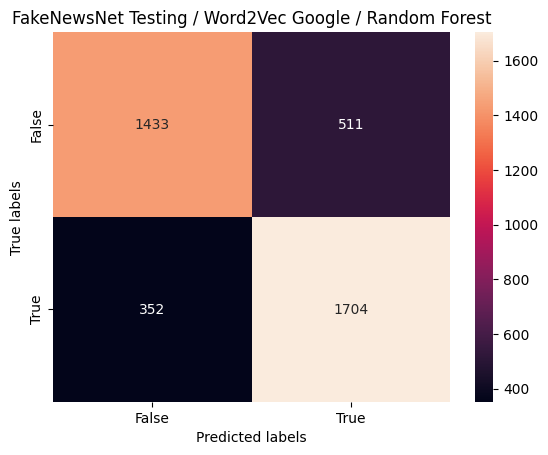

In [44]:
plot_cf(y_test, result_rf.predict(X_test), 'FakeNewsNet Testing / Word2Vec Google / Random Forest')

In [51]:
print(classification_report(master_df['label'], result_rf.predict(liar_w2v_X)))

              precision    recall  f1-score   support

           0       0.44      0.82      0.57      5657
           1       0.54      0.17      0.25      7134

    accuracy                           0.46     12791
   macro avg       0.49      0.49      0.41     12791
weighted avg       0.50      0.46      0.40     12791



<module 'matplotlib.pyplot' from '/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

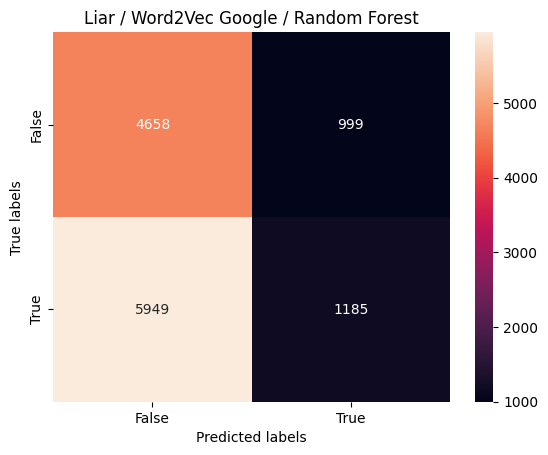

In [45]:
plot_cf(master_df['label'], result_rf.predict(liar_w2v_X), 'Liar / Word2Vec Google / Random Forest')

In [31]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

clf_nb = BernoulliNB()
result_nb = clf_nb.fit(X_train, y_train)
print("BernoulliNB")
print(classification_report(y_test, result_nb.predict(X_test)))

clf_gnb = GaussianNB()
result_gnb = clf_gnb.fit(X_train, y_train)
print("GaussianNB")
print(classification_report(y_test, result_gnb.predict(X_test)))


BernoulliNB
              precision    recall  f1-score   support

       False       0.48      0.01      0.02      1178
        True       0.54      0.99      0.70      1381

    accuracy                           0.54      2559
   macro avg       0.51      0.50      0.36      2559
weighted avg       0.51      0.54      0.39      2559

GaussianNB
              precision    recall  f1-score   support

       False       0.49      0.71      0.58      1178
        True       0.60      0.37      0.45      1381

    accuracy                           0.53      2559
   macro avg       0.54      0.54      0.52      2559
weighted avg       0.55      0.53      0.51      2559



In [32]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
result_lr = clf_lr.fit(X_train, y_train)

print("LogisticRegression")
print(classification_report(y_test, result_lr.predict(X_test)))

LogisticRegression
              precision    recall  f1-score   support

       False       0.60      0.42      0.49      1178
        True       0.61      0.77      0.68      1381

    accuracy                           0.61      2559
   macro avg       0.61      0.59      0.59      2559
weighted avg       0.61      0.61      0.59      2559



SVC

In [43]:
from sklearn.svm import SVC

clf_svc = SVC(C=10, kernel='rbf', degree=3)
result_svc = clf_svc.fit(X_train, y_train)

print("SVC")
print(classification_report(y_test, result_svc.predict(X_test)))

SVC
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1944
           1       0.86      0.85      0.85      2056

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000



In [46]:
# save model
from joblib import dump
dump(result_svc, 'w2v_clf_svc.joblib')

['w2v_clf_svc.joblib']

<module 'matplotlib.pyplot' from '/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

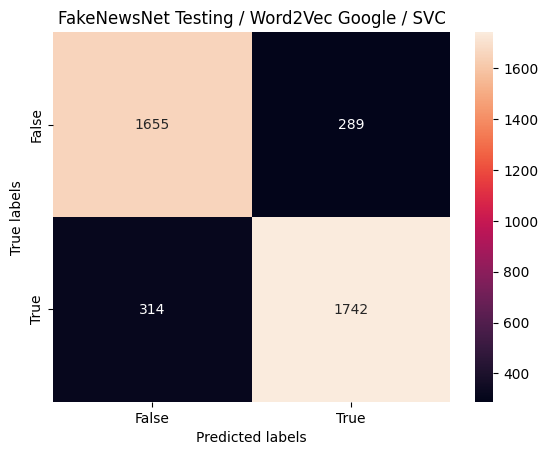

In [57]:
plot_cf(y_test, result_svc.predict(X_test), 'FakeNewsNet Testing / Word2Vec Google / SVC')

In [52]:
print(classification_report(master_df['label'], result_svc.predict(liar_w2v_X)))

              precision    recall  f1-score   support

           0       0.44      0.82      0.57      5657
           1       0.54      0.17      0.25      7134

    accuracy                           0.46     12791
   macro avg       0.49      0.49      0.41     12791
weighted avg       0.50      0.46      0.40     12791



<module 'matplotlib.pyplot' from '/home/kooler/dev/sw/sns-fake-content/model/env_model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

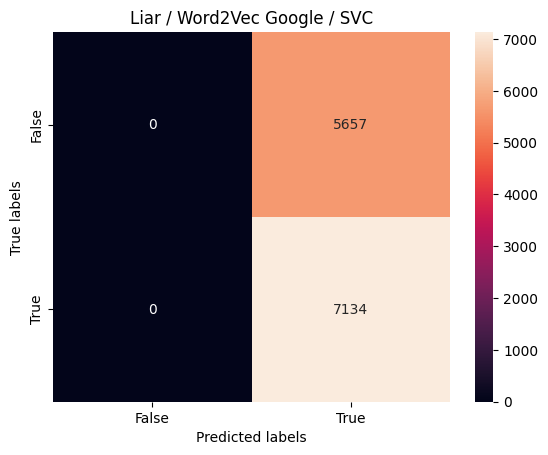

In [56]:
plot_cf(master_df['label'], result_svc.predict(liar_w2v_X), 'Liar / Word2Vec Google / SVC')